Ініціалізація середовища виконання
GPU виявлено та активовано: /physical_device:GPU:0

Завантаження набору даних
Тренувальних зразків: 560000
Тестових зразків:     38000

Налаштування препроцесингу тексту
Адаптація векторизатора до тренувальних даних...
Векторизатор готовий до роботи.

Побудова архітектури моделі


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_5            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_4 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_4             │ (None, 100, 128)       │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 100, 128)       │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 80)             │         5,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            81 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,425,313 (5.44 MB)

 Trainable params: 1,425,313 (5.44 MB)

 Non-trainable params: 0 (0.00 B)


Початок тренування моделі
Epoch 1/7
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 189s 21ms/step - accuracy: 0.8290 - loss: 0.3549 - val_accuracy: 0.9081 - val_loss: 0.2237
Epoch 2/7
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 184s 21ms/step - accuracy: 0.9051 - loss: 0.2308 - val_accuracy: 0.9143 - val_loss: 0.2072
Epoch 3/7
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 184s 21ms/step - accuracy: 0.9158 - loss: 0.2066 - val_accuracy: 0.9214 - val_loss: 0.1926
Epoch 4/7
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 184s 21ms/step - accuracy: 0.9253 - loss: 0.1865 - val_accuracy: 0.9249 - val_loss: 0.1847
Epoch 5/7
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 187s 21ms/step - accuracy: 0.9311 - loss: 0.1733 - val_accuracy: 0.9265 - val_loss: 0.1823
Epoch 6/7
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 184s 21ms/step - accuracy: 0.9349 - loss: 0.1639 - val_accuracy: 0.9282 - val_loss: 0.1804
Epoch 7/7
8750/8750 ━━━━━━━━━━━━━━━━━━━━ 184s 21ms/step - accuracy: 0.9385 - loss: 0.1560 - val_accuracy: 0.9275 - val_loss: 0.1826
Restoring model weights from the end of the best 

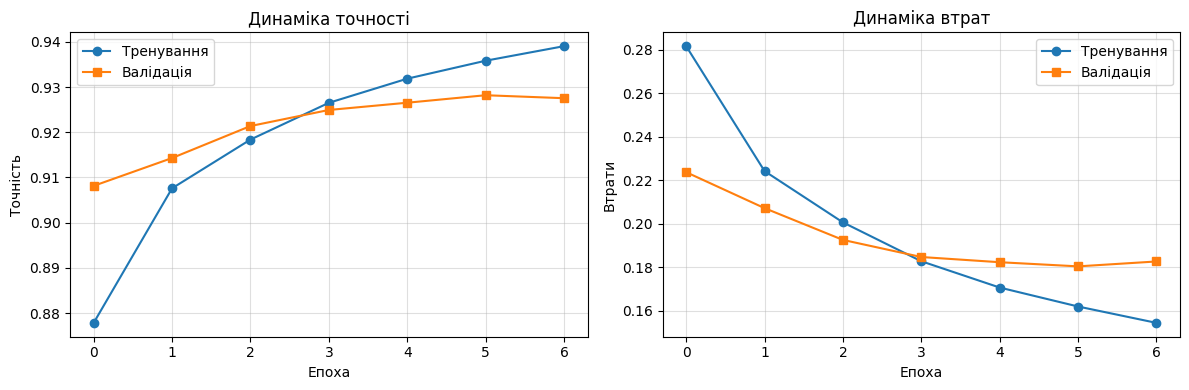


Матриця плутанини та звіт класифікації
594/594 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step


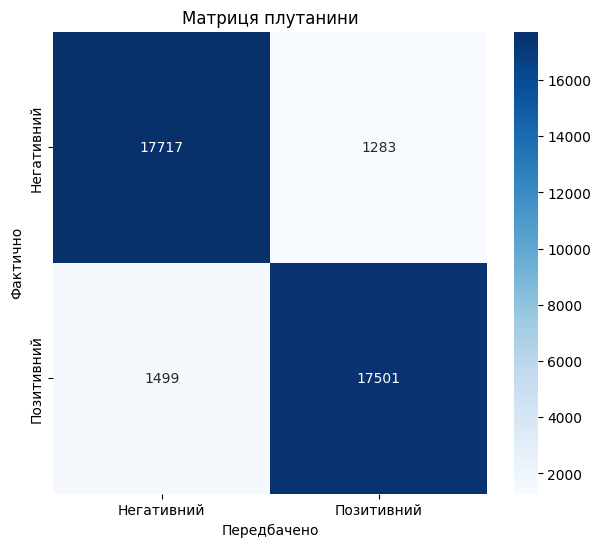

              precision    recall  f1-score   support

  Негативний       0.92      0.93      0.93     19000
  Позитивний       0.93      0.92      0.93     19000

    accuracy                           0.93     38000
   macro avg       0.93      0.93      0.93     38000
weighted avg       0.93      0.93      0.93     38000


Демонстрація передбачення сентименту

Тестування на випадкових відгуках з датасету:

Вхідний текст: "Was not impressed, and will not return."
Передбачена мітка: Негативний  |  Впевненість: 99.9%

Вхідний текст: "I went in to purchase overalls and was treated so rudely I had to walk out even though he had the item I wanted.  I will never step foot in this place..."
Передбачена мітка: Негативний  |  Впевненість: 99.9%

Вхідний текст: "This place really is horrible... Every time I wind up getting convinced to go here, I always walk out feeling like my pocket has been picked. The food..."
Передбачена мітка: Негативний  |  Впевненість: 100.0%

Вхідний текст: "First tim

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import TextVectorization
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc


print("Ініціалізація середовища виконання")

gpu_lista = tf.config.list_physical_devices('GPU')
if gpu_lista:
    try:
        tf.config.set_visible_devices(gpu_lista[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpu_lista[0], True)
        print(f"GPU виявлено та активовано: {gpu_lista[0].name}")
    except RuntimeError as err:
        print("Помилка конфігурації GPU:", err)
else:
    print("Виконання на CPU (GPU не знайдено).")


SHLYAH_MODELI = "/kaggle/working/sentiment_lstm_v2.keras"

# Основні гіперпараметри
ROZMIR_SLOVNYKA = 10000
MAKSYMALNA_DOVZHYNA = 100
VYMIRY_EMBEDDINHU = 128
ROZMIR_BATCHA = 64
KILKIST_EPOCH = 7
TERPELYVIST = 3


print("\nЗавантаження набору даних")

(trenuvalnyj_dataset, testovyj_dataset), meta_info = tfds.load(
    "yelp_polarity_reviews",
    split=["train", "test"],
    as_supervised=True,
    shuffle_files=True,
    with_info=True
)

print(f"Тренувальних зразків: {meta_info.splits['train'].num_examples}")
print(f"Тестових зразків:     {meta_info.splits['test'].num_examples}")

AUTO_НАЛАШТУВАННЯ = tf.data.AUTOTUNE
trenuvalnyj_dataset = trenuvalnyj_dataset.batch(ROZMIR_BATCHA).cache().prefetch(AUTO_НАЛАШТУВАННЯ)
testovyj_dataset = testovyj_dataset.batch(ROZMIR_BATCHA).cache().prefetch(AUTO_НАЛАШТУВАННЯ)


print("\nНалаштування препроцесингу тексту")

@tf.keras.utils.register_keras_serializable()
def ochystka_tekstu(tekst):
    tekst = tf.strings.lower(tekst)
    tekst = tf.strings.regex_replace(tekst, "<br />", " ")
    tekst = tf.strings.regex_replace(tekst, r"[^a-zA-Z']", " ")
    return tekst

vektorizator = TextVectorization(
    standardize=ochystka_tekstu,
    max_tokens=ROZMIR_SLOVNYKA,
    output_mode="int",
    output_sequence_length=MAKSYMALNA_DOVZHYNA
)

print("Адаптація векторизатора до тренувальних даних...")
vektorizator.adapt(trenuvalnyj_dataset.map(lambda txt, etyketa: txt))
print("Векторизатор готовий до роботи.")


print("\nПобудова архітектури моделі")

model_sentymentu = models.Sequential([
    layers.Input(shape=(1,), dtype=tf.string),
    vektorizator,

    layers.Embedding(ROZMIR_SLOVNYKA, VYMIRY_EMBEDDINHU),

    layers.SpatialDropout1D(0.25),

    layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.2)),
    layers.Bidirectional(layers.LSTM(32, dropout=0.2)),

    layers.Dense(80, activation='relu'),
    layers.Dropout(0.4),

    layers.Dense(1, activation='sigmoid')
])


model_sentymentu.compile(
    loss="binary_crossentropy",
    optimizer=optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"]
)

model_sentymentu.summary()


print("\nПочаток тренування моделі")

rannye_zupynennya = EarlyStopping(
    monitor="val_loss",
    patience=TERPELYVIST,
    restore_best_weights=True,
    verbose=1
)

istoriya_navchannya = model_sentymentu.fit(
    trenuvalnyj_dataset,
    epochs=KILKIST_EPOCH,
    validation_data=testovyj_dataset,
    callbacks=[rannye_zupynennya],
    verbose=1
)

model_sentymentu.save(SHLYAH_MODELI)
print(f"Модель збережено за адресою: {SHLYAH_MODELI}")


print("\nОцінка продуктивності моделі")

vtraty_test, tochnist_test = model_sentymentu.evaluate(testovyj_dataset, verbose=1)
print(f"Точність на валідації: {tochnist_test:.4f}")
print(f"Втрати на валідації:   {vtraty_test:.4f}")

dani_istoriyi = istoriya_navchannya.history

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(dani_istoriyi["accuracy"], marker='o', label="Тренування")
plt.plot(dani_istoriyi["val_accuracy"], marker='s', label="Валідація")
plt.title("Динаміка точності")
plt.xlabel("Епоха")
plt.ylabel("Точність")
plt.grid(alpha=0.4)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(dani_istoriyi["loss"], marker='o', label="Тренування")
plt.plot(dani_istoriyi["val_loss"], marker='s', label="Валідація")
plt.title("Динаміка втрат")
plt.xlabel("Епоха")
plt.ylabel("Втрати")
plt.grid(alpha=0.4)
plt.legend()

plt.tight_layout()
plt.show()


print("\nМатриця плутанини та звіт класифікації")

sprazhni_mityky = np.concatenate([etyketa for _, etyketa in testovyj_dataset], axis=0)
peredbacheni_ymovirnosti = model_sentymentu.predict(testovyj_dataset)
peredbacheni_mityky = (peredbacheni_ymovirnosti > 0.5).astype(int).reshape(-1)

matrytsia_plutanyny = confusion_matrix(sprazhni_mityky, peredbacheni_mityky)
nazvy_klasiv = ["Негативний", "Позитивний"]

plt.figure(figsize=(7, 6))
sns.heatmap(matrytsia_plutanyny, annot=True, cmap="Blues", fmt="d",
            xticklabels=nazvy_klasiv, yticklabels=nazvy_klasiv)
plt.title("Матриця плутанини")
plt.xlabel("Передбачено")
plt.ylabel("Фактично")
plt.show()

print(classification_report(sprazhni_mityky, peredbacheni_mityky, target_names=nazvy_klasiv))

print("\nДемонстрація передбачення сентименту")

def peredbachyty_sentyment(pryklad_tekstu, posylannya_modeli, maks_perehlyad=150):
    tenzor_tekstu = tf.constant([pryklad_tekstu])
    otsinka = posylannya_modeli.predict(tenzor_tekstu, verbose=0)[0][0]

    etyketa = "Позитивний" if otsinka > 0.5 else "Негативний"
    vpevnenist = otsinka if otsinka > 0.5 else 1 - otsinka

    pereghlyad = pryklad_tekstu[:maks_perehlyad] + "..." if len(pryklad_tekstu) > maks_perehlyad else pryklad_tekstu

    print(f"Вхідний текст: \"{pereghlyad}\"")
    print(f"Передбачена мітка: {etyketa}  |  Впевненість: {vpevnenist*100:.1f}%\n")


print("\nТестування на випадкових відгуках з датасету:\n")

zrazky = testovyj_dataset.unbatch().take(8)
teksty_zrazkiv = [txt.numpy().decode("utf-8") for txt, _ in zrazky]

for zrazok in teksty_zrazkiv:
    peredbachyty_sentyment(zrazok, model_sentymentu)


print("\nТестування на власних прикладах:\n")

vlasni_teksty = [
    "Absolutely wonderful experience! The attention to detail was remarkable.",
    "Terrible service and the quality was far below expectations.",
    "Pretty decent overall. Not bad for what you pay, but nothing special.",
    "I was blown away by how good everything was. Highly recommend!",
    "Disappointing and overpriced. Definitely won't be coming back here.",
    "Fantastic! Beyond amazing in every single way possible."
]

for tekst in vlasni_teksty:
    peredbachyty_sentyment(tekst, model_sentymentu)